## Loading Dataset, Installing dependencies, Performing Sentiment Analysis

In [ ]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '13U0iA49UMjjSTPrVMkkamqtU9Q2qepUO' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweet_data.csv')  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('dark')
from wordcloud import WordCloud
from textblob import TextBlob

In [ ]:
df = pd.read_csv('tweet_data.csv', lineterminator='\n')
df = df.drop(['Unnamed: 0'],axis=1)

In [ ]:
# Performing VADER Sentiment Analysis
import nltk
nltk.download('vader_lexicon') # Download the VADER lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
df['VScore'] = df['Clean Text'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
df['VComp'] = df['VScore'].apply(lambda score_dict: score_dict['compound'])

# Set threshold to define neutral sentiment
neutral_thresh = 0.05

# Categorize scores into the sentiments of positive, neutral or negative
df['Sentiment'] = df['VComp'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Ngrams Analysis



In [ ]:
import networkx as nx
import itertools, collections
from nltk import bigrams
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords_to_add = ['covid19', 'covid','vaccine', 'covid-19', '19', 'vaccines', 'vaccine.','vaccine?', '-', '.']
stop_words.extend(new_stopwords_to_add)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Check d[0].items() for understanding more about graph plot

def BigramsAnalysis(sentiment):
  l_words = df[df["Sentiment"]==sentiment]["Clean Text"].tolist()
  words_in_tweet = [tweet.split() for tweet in l_words]
  words_lemmatized = [[word for word in tweet_words]
              for tweet_words in words_in_tweet]
  tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_lemmatized]
  terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw if tweet]
  bigrams_list = list(itertools.chain(*terms_bigram))
  bigram_counts = collections.Counter(bigrams_list)
  bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])
  d = bigram_df.set_index('bigram').T.to_dict('records')
  G = nx.Graph()
  for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v))
  fig, ax = plt.subplots(figsize=(14, 10))

  pos = nx.spring_layout(G, k=2)

  # Plot networks
  nx.draw_networkx(G, pos,
                  font_size=16,
                  width=3,
                  edge_color='grey',
                  node_color='purple',
                  with_labels = False,
                  ax=ax)

  # Create offset labels
  for key, value in pos.items():
      x, y = value[0]+.100, value[1]+.025
      ax.text(x, y,
              s=key,
              bbox=dict(facecolor='red', alpha=0.15),
              horizontalalignment='center', fontsize=13)
      
  plt.show()
  return bigram_df

def Search(keywords):
  pd.set_option('display.max_colwidth', 400)
  result = df[df["Clean Text"].str.contains(keywords)]["Text"]
  return result

# Testing Analysis on data

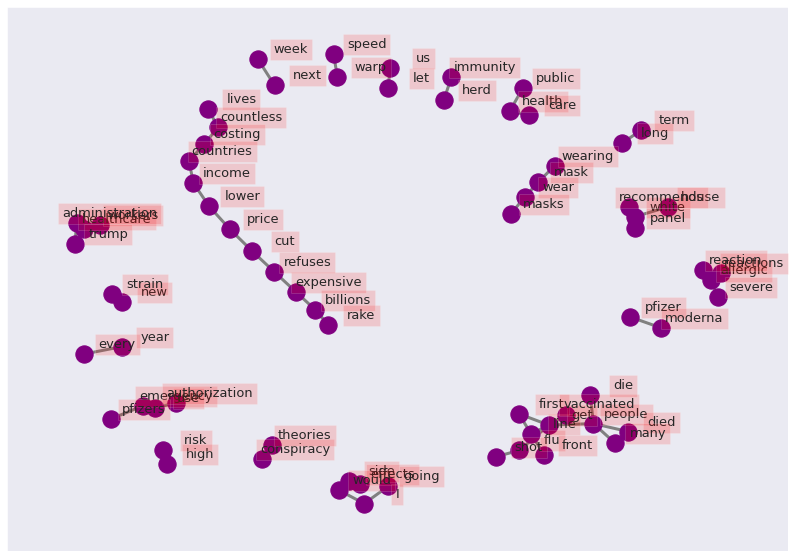

In [ ]:
input_ = 'Negative'
neg = BigramsAnalysis(input_)

In [ ]:
neg

,bigram,count
0,"(emergency, use)",7756
1,"(side, effects)",6972
2,"(allergic, reactions)",5082
3,"(allergic, reaction)",3578
4,"(new, strain)",3241
5,"(healthcare, workers)",2949
6,"(long, term)",2796
7,"(use, authorization)",2794
8,"(flu, shot)",2390
9,"(wear, mask)",2335


In [ ]:
Search("healthcare workers")

19                                                                                                                                                           COVID-19 vaccine committee votes to include nursing homes with healthcare workers in first round of distribution https://t.co/QbQqqI6hp5
24                                                                                                                                             Covid live updates: Health-care workers, nursing home residents should get vaccine first, CDC panel says - The Washington Post https://t.co/ScPzXOczMZ
53         @NPR I’m not anti-vaccine. However, given the quick creation/testing of the new covid vaccines - how do we know about the potential long-term risk factors associated with taking it? We run the risk of possibly effecting our entire force of healthcare workers when we need them most.
60                                                         Anyone else deeply uncomfortable with the idea of healthcar

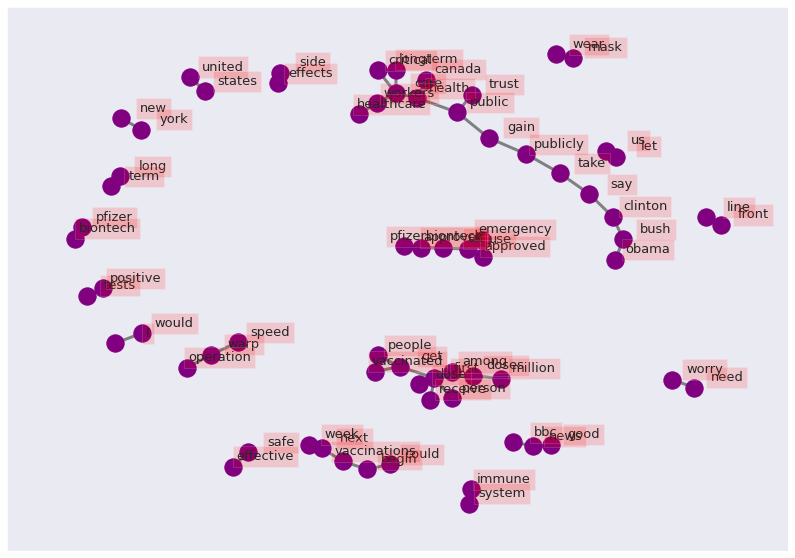

In [ ]:
input_ = 'Positive'
pos = BigramsAnalysis(input_)

In [ ]:
pos

,bigram,count
0,"(health, care)",9892
1,"(next, week)",8230
2,"(care, workers)",6140
3,"(approves, pfizerbiontech)",5116
4,"(approved, use)",5079
5,"(side, effects)",5038
6,"(let, us)",4859
7,"(uk, approves)",4828
8,"(emergency, use)",4126
9,"(use, uk)",3833
